In [1]:
import pandas as pd
import numpy as np
# import pydot

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

from sklearn.metrics import f1_score,roc_curve,auc,precision_score,recall_score

from sklearn.metrics import confusion_matrix

import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.api as smd
from statsmodels.stats.proportion import proportions_ztest

# 가설검정, 분산분석하는 패키지
from statsmodels.formula.api import ols # 분산분석하기? 모델링?
from statsmodels.stats.anova import anova_lm # 아노바 데이터프레임 형태 출력
from scipy.stats import shapiro
%matplotlib inline
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit

# font_path = 'C:/Windows/Fonts/gulim.ttc'
font_path = 'C:/Windows/Fonts/gulim.ttc'
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family = font_name)

from matplotlib import font_manager,rc

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.api import qqplot, add_constant

# from sklearn.tree import export_graphviz
# import graphviz

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
# import pydot

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

from sklearn.metrics import f1_score,roc_curve,auc,precision_score,recall_score

from sklearn.metrics import confusion_matrix

import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.api as smd
from statsmodels.stats.proportion import proportions_ztest

# 가설검정, 분산분석하는 패키지
from statsmodels.formula.api import ols # 분산분석하기? 모델링?
from statsmodels.stats.anova import anova_lm # 아노바 데이터프레임 형태 출력
from scipy.stats import shapiro
%matplotlib inline
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit

# # font_path = 'C:/Windows/Fonts/gulim.ttc'
# font_path = '/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'
# font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
# matplotlib.rc('font', family = font_name)

from matplotlib import font_manager,rc

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.api import qqplot, add_constant

# from sklearn.tree import export_graphviz
# import graphviz

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df_raw = pd.read_csv('insu_request.csv',encoding = 'euckr')
df_raw = df_raw[df_raw['insu_pay_amount'].isna() == False]

In [3]:
df1 = df_raw.groupby(['customer_id','req_id'])[['insu_req_amount']].sum()
df2 = df_raw.groupby(['customer_id','req_id'])[['insu_pay_amount']].mean()

In [4]:
df = pd.merge(df1,df2,on = 'customer_id')

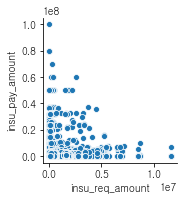

In [5]:
sns.pairplot(df, x_vars='insu_req_amount',y_vars='insu_pay_amount')

In [6]:
df.corr() # 청구 건별로 고려하면 둘 사이 상관 관계가 존재하지 X

,insu_req_amount,insu_pay_amount
insu_req_amount,1.000000,0.086716
insu_pay_amount,0.086716,1.000000


In [7]:
# 입원과 외래를 분리한 경우 상관 관계 => 존재하지 않음

t1 = df_raw.groupby(['customer_id','req_id','dg_cat'])[['insu_req_amount']].sum()
t2 = df_raw.groupby(['customer_id','req_id','dg_cat'])[['insu_pay_amount']].mean()
tf = pd.merge(t1,t2,on = 'customer_id')
tf.corr()

,insu_req_amount,insu_pay_amount
insu_req_amount,1.000000,0.092361
insu_pay_amount,0.092361,1.000000


In [8]:
# 고객 id 당 청구와 지급, 납입을 비교해서 상관관계 파악

df3 = df_raw.groupby('customer_id')[['insu_cum_amount']].max()

df_1 = df.groupby('customer_id').sum()
df_2 = pd.merge(df_1,df3,on='customer_id')
df_2

,insu_req_amount,insu_pay_amount,insu_cum_amount
customer_id,,,
C112379,1246196,2429154.0,1800000
C112404,808750,1008750.0,600000
C112411,333680,553680.0,240000
C112570,5524558,5704558.0,4875000
C112727,201880,201880.0,3250000
...,...,...,...
C134197,5673144,5703144.0,4000000
C134221,56535480,89559477.0,3600000
C134227,1048112,1048112.0,1100000


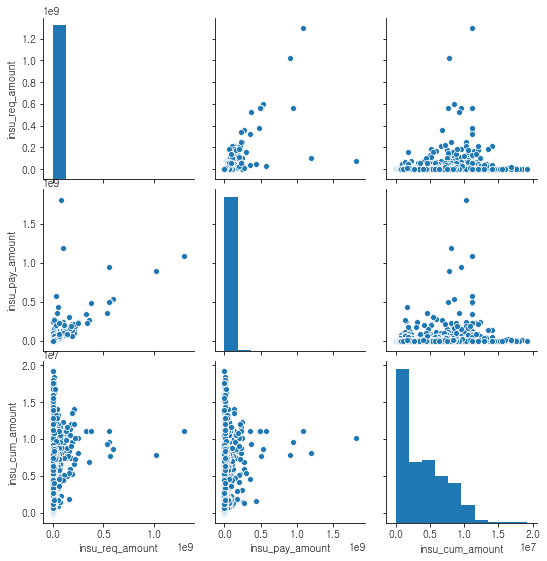

In [9]:
sns.pairplot(df_2)

In [10]:
df_2.corr() # pay와 req의 상관관계가 크다 => pay : 실질 지급액(수익 영향)
# req에 따라 pay가 어떻게 변하는지, 왜 과지급이 발생하는지 확인해보기!

,insu_req_amount,insu_pay_amount,insu_cum_amount
insu_req_amount,1.000000,0.703708,0.196788
insu_pay_amount,0.703708,1.000000,0.169607
insu_cum_amount,0.196788,0.169607,1.000000


In [27]:
new_set = df_2[(df_2['insu_req_amount'] < 0.7e9) & (df_2['insu_pay_amount'] < 0.7e9)] # 5명 제거

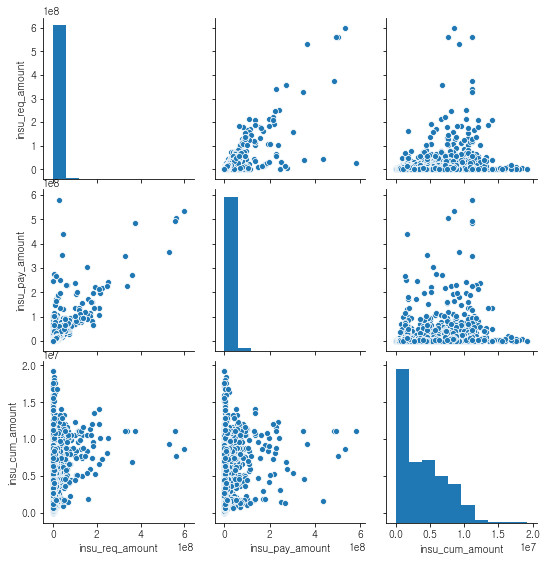

In [28]:
sns.pairplot(new_set)

In [29]:
new_set.corr()

,insu_req_amount,insu_pay_amount,insu_cum_amount
insu_req_amount,1.000000,0.804299,0.229906
insu_pay_amount,0.804299,1.000000,0.209283
insu_cum_amount,0.229906,0.209283,1.000000


In [30]:
new_id = new_set.index

In [31]:
df_pro = df_raw[df_raw['customer_id'].isin(new_id)]

In [32]:
df_pro # req_pay 이상치가 제거된 request data

,customer_id,review_cat,judge,gender,age,insu_id,insu_contract_date,insu_prod_id,insu_prod_name,req_id,...,sick_3rd,dg_cat,dg_start_date,dg_end_date,dg_duration,insu_req_amount,insu_pay_amount,insu_pay_date,insu_duration,insu_cum_amount
0,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20101118-12660-01-001,...,NaN,외래,24-Oct-15,16-Nov-15,24,424498,724498.0,18-Nov-15,11,1320000
1,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,외래,17-Feb-16,17-Feb-16,1,34950,490079.0,13-Mar-16,15,1800000
2,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,외래,24-Feb-16,24-Feb-16,1,0,490079.0,13-Mar-16,15,1800000
3,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,외래,02-Mar-16,02-Mar-16,1,0,490079.0,13-Mar-16,15,1800000
4,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,외래,09-Mar-16,09-Mar-16,1,16000,490079.0,13-Mar-16,15,1800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49444,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,...,NaN,외래,25-Sep-17,25-Sep-17,1,19100,140900.0,06-Jun-18,33,1650000
49445,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,...,NaN,외래,25-Sep-17,25-Sep-17,1,42970,140900.0,06-Jun-18,33,1650000
49446,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,...,NaN,외래,20-Nov-17,20-Nov-17,1,31200,140900.0,06-Jun-18,33,1650000
49447,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,...,NaN,외래,13-Dec-17,13-Dec-17,1,33200,140900.0,06-Jun-18,33,1650000


In [33]:
df_pro.to_csv('new_request.csv',encoding='euckr') # 전처리가 완료된 new_request 생성